<a href="https://colab.research.google.com/github/ainhoa-p/MIA/blob/main/Datos_demogr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
from rich import print
from rich.console import Console
from rich.panel import Panel

console = Console()

In [65]:
from google.colab import files
uploaded= files.upload ()

Saving Database_paper5_T1-rim-PRLs-CaseControl_anon_ainhoay.xlsx to Database_paper5_T1-rim-PRLs-CaseControl_anon_ainhoay (5).xlsx


In [66]:
miArchivo = list (uploaded.keys ()) [0]

df = pd.read_excel (miArchivo)

In [67]:
print(df.columns.tolist())

[
    'EDMUS',
    'DOB',
    'Age_MRI',
    'Sex_fem',
    'MRI_Date',
    'Disease_duration',
    'EDSS_Baseline',
    'Onset',
    'Age_onset',
    '2nd_relapse',
    'Interval_2nd_relapse',
    'Last_Fup',
    'Fup_interval',
    'EDSS_Last_Fup',
    'Outcome_SPMS',
    'Onset_SPMS',
    'Missing_Fup_(cambio_centro_0,_Neo_1,_Exitus_2,_unknow_3',
    'tto_plataforma_inicio',
    'tto_plataforma_fin',
    'tto_plat_intervalo',
    'tto_alta_eficacia_inicio',
    'tto_alta_eficacia_fin',
    'tto_alta_intervalo',
    'CURRENT_TTO',
    'lesiones'
]

    'Age_MRI',
    'Sex_fem',
    'Disease_duration',
    'EDSS_Baseline':  escala de progresión de esclerosis mútiple.
    'Age_onset',
    'Fup_interval',
    'Outcome_SPMS': control (0) o caso (1) convierte a secundaria progresiva esclerosis multiple.
    'Missing_Fup_(cambio_centro_0,_Neo_1,_Exitus_2,_unknow_3',
    'CURRENT_TTO'
    'lesiones'
]

In [68]:
#reduzco la cantidad de columnas
df_reducido = df[['Age_MRI', 'Sex_fem', 'Disease_duration','EDSS_Baseline', 'Age_onset','Fup_interval', 'Outcome_SPMS', 'Missing_Fup_(cambio_centro_0,_Neo_1,_Exitus_2,_unknow_3', 'CURRENT_TTO', 'lesiones']]

In [69]:
#renombro alguna columna
df_reducido = df_reducido.rename (columns = {'Outcome_SPMS' : 'control_caso', 'Missing_Fup_(cambio_centro_0,_Neo_1,_Exitus_2,_unknow_3': 'perdidos' })
console.print (df_reducido)

Age_MRI  Sex_fem  Disease_duration  EDSS_Baseline  Age_onset  \
0    25.549762        1          7.611364            4.0  17.938398   
1    43.194123        0         26.671194            3.0  16.522930   
2    33.902972        1         10.245203            3.0  23.657769   
3    26.264609        0          3.715670            3.0  22.548939   
4    47.904803        1         15.127253            2.5  32.777550   
..         ...      ...               ...            ...        ...   
115  50.392893        0         23.622188            3.5  26.770705   
116  39.318859        0         13.974574            1.5  25.344285   
117  41.983229        1          1.200203            3.0  40.783025   
118  53.936373        1         31.338153            3.5  22.598220   
119  54.730708        1          2.500728            2.0  52.229979   

     Fup_interval  control_caso  perdidos  CURRENT_TTO  lesiones  
0        5.908143             0       NaN            2        53  
1        6.388355             1       NaN            2         5  
2        6.466638             0       NaN            1        16  
3        6.485562             0       NaN            2        16  
4        5.773500             1       NaN            2        15  
..            ...           ...       ...          ...       ...  
115      4.930858             1       NaN            1        18  
116      4.820772             1       NaN            1         5  
117      4.034567             1       NaN            0         6  
118      3.793948             1       NaN            1         4  
119      3.935959             1       NaN            0         4  

[120 rows x 10 columns]

In [70]:
df_reducido.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_MRI           120 non-null    float64
 1   Sex_fem           120 non-null    int64  
 2   Disease_duration  120 non-null    float64
 3   EDSS_Baseline     120 non-null    float64
 4   Age_onset         120 non-null    float64
 5   Fup_interval      120 non-null    float64
 6   control_caso      120 non-null    int64  
 7   perdidos          4 non-null      float64
 8   CURRENT_TTO       120 non-null    int64  
 9   lesiones          120 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 9.5 KB


In [71]:
#Cambiar 'lesiones' de object a float64
df_reducido['lesiones'] = df_reducido['lesiones'].astype('float64')
df_reducido.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_MRI           120 non-null    float64
 1   Sex_fem           120 non-null    int64  
 2   Disease_duration  120 non-null    float64
 3   EDSS_Baseline     120 non-null    float64
 4   Age_onset         120 non-null    float64
 5   Fup_interval      120 non-null    float64
 6   control_caso      120 non-null    int64  
 7   perdidos          4 non-null      float64
 8   CURRENT_TTO       120 non-null    int64  
 9   lesiones          120 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 9.5 KB


In [72]:
df_reducido. describe()

,Age_MRI,Sex_fem,Disease_duration,EDSS_Baseline,Age_onset,Fup_interval,control_caso,perdidos,CURRENT_TTO,lesiones
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,4.000000,120.000000,120.000000
mean,48.942906,0.666667,16.329148,3.612500,32.613758,5.530560,0.500000,2.000000,1.133333,8.750000
std,10.510502,0.473381,10.420307,1.624992,10.174284,0.648942,0.502096,1.414214,0.732594,9.347853
min,25.041421,0.000000,0.813294,0.000000,14.406571,3.330377,0.000000,0.000000,0.000000,0.000000
25%,42.078496,0.000000,8.240406,2.500000,24.512663,5.206422,0.000000,1.500000,1.000000,3.000000
50%,48.337291,1.000000,15.264065,3.500000,32.731006,5.553054,0.500000,2.500000,1.000000,5.000000
75%,54.823805,1.000000,22.634523,4.000000,38.509240,5.978486,1.000000,3.000000,2.000000,13.000000
max,74.129936,1.000000,48.971791,7.500000,64.309377,6.579679,1.000000,3.000000,2.000000,53.000000


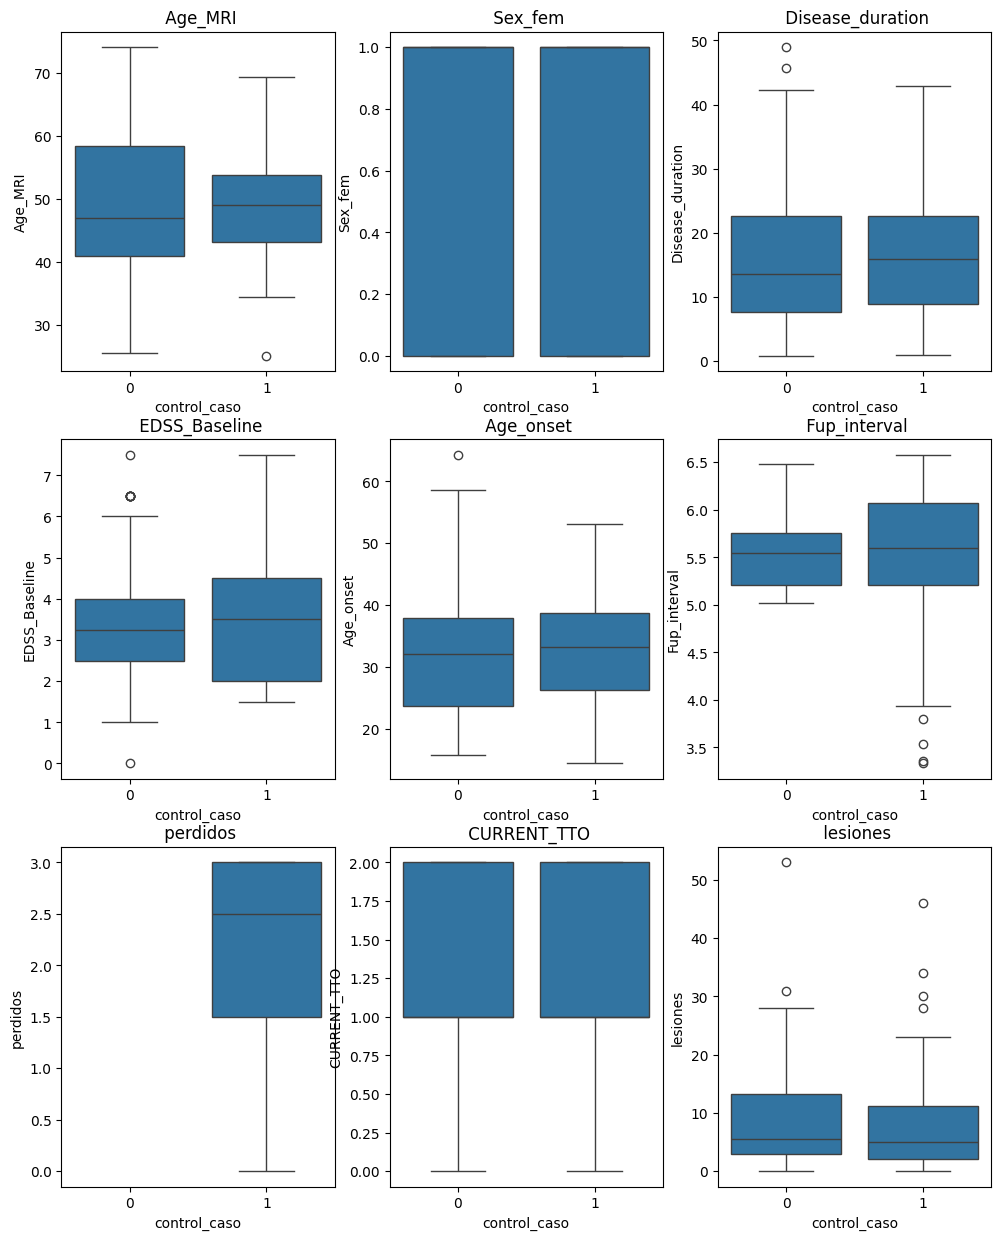

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df_reducido.drop('control_caso', axis=1)
y = df_reducido['control_caso']
feature_names = X.columns

#Selecciona el tamaño de la figura y crea una figura que tenga 3 columnas y de filas el número de variables a representar entre 3.
plt.figure(figsize=(12, 15))
n_features = len(feature_names)
rows = (n_features + 1) // 3
cols = 3
#Crea el gráfico de cajas para cada variable en función de si ha tenido evento cardiovascular o no.
for i, feature in enumerate(feature_names, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=y, y=feature, data=df_reducido)
    plt.title(f' {feature}')
    plt.xlabel('control_caso')

Solo descuadra un paciente de los controles que tiene 53 T1rims igual se podría revisar.

In [75]:
#Se comprueba si la variable lesiones sigue una distribución normal
from scipy.stats import shapiro
stat, p = shapiro(df_reducido['lesiones'].dropna())

print(f'Estadístico W: {stat}')
print(f'Valor p: {p}')

if p > 0.05:
    print("✅ La variable 'lesiones' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("❌ La variable 'lesiones' no sigue una distribución normal (se rechaza H0).")



Estadístico W: 0.7861435396194917

Valor p: 6.19508052581018e-12

❌ La variable 'lesiones' no sigue una distribución normal (se rechaza H0).

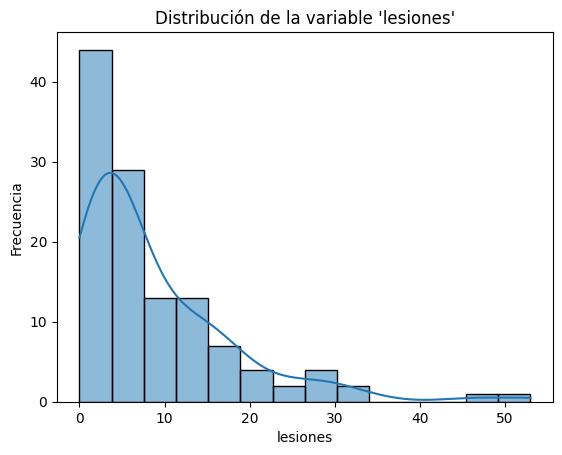

In [78]:
sns.histplot(df_reducido['lesiones'].dropna(), kde=True)
plt.title("Distribución de la variable 'lesiones'")
plt.xlabel("lesiones")
plt.ylabel("Frecuencia")
plt.show()


In [79]:
from scipy.stats import mannwhitneyu

# Separar los datos por grupo
grupo_control = df_reducido[df_reducido['control_caso'] == 0]['lesiones'].dropna()
grupo_caso = df_reducido[df_reducido['control_caso'] == 1]['lesiones'].dropna()

# Aplicar el test de Mann-Whitney U
stat, p = mannwhitneyu(grupo_control, grupo_caso, alternative='two-sided')

print(f'Estadístico U: {stat}')
print(f'Valor p: {p}')

if p < 0.05:
    print("❌ Hay diferencias estadísticamente significativas entre los grupos (se rechaza H0).")
else:
    print("✅ No hay diferencias estadísticamente significativas entre los grupos (no se rechaza H0).")

Estadístico U: 1961.0

Valor p: 0.3982435082729556

✅ No hay diferencias estadísticamente significativas entre los grupos (no se rechaza H0).

Usando la U de Mann Whitney con los datos sin emparejar me sale que no hay diferencias significativas en el número de lesiones entre el grupo control y el grupo caso.